# India's 100 Richest People - (2021 RANKING)

https://www.forbes.com/india-billionaires/list/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2021

url = 'http://www.forbes.com/ajax/list/data'

parameter =  {'type': 'person', 'year': year, 'uri': 'india-billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
rank = []
name = []
worth = []
source = []
squareImage = []

for i in range(100):
  rank.append(r.json()[i]['rank'])
  name.append(r.json()[i]['name'])
  worth.append(r.json()[i]['worth'])
  source.append(r.json()[i]['source'])

# Create Dataframe

In [5]:
data = {
  'Rank': rank,
  'Name': name,
  'NetWorth': worth,
  'OriginOfWealth': source
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df

,Rank,Name,NetWorth,OriginOfWealth
0,1,Mukesh Ambani,92700.0,diversified
1,2,Gautam Adani,74800.0,"commodities, infrastructure"
2,3,Shiv Nadar,31000.0,software services
3,4,Radhakishan Damani,29400.0,"retail, investments"
4,5,Cyrus Poonawalla,19000.0,vaccines
...,...,...,...,...
95,96,Chandrakant & Rajendra Gogri,2100.0,chemicals
96,97,Deepak Mehta,2050.0,chemicals
97,98,Vinod Saraf,2000.0,chemicals
98,99,Bajranglal Taparia,1950.0,plastics


In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            100 non-null    int64  
 1   Name            100 non-null    object 
 2   NetWorth        100 non-null    float64
 3   OriginOfWealth  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [9]:
df['Rank'] = df['Rank'].astype('category')                      # change Rank data type to categorical                
df['Rank'].dtypes

CategoricalDtype(categories=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                   13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
                   25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
                   37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
                   49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
                   61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
                   73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
                   85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
                   97,  98,  99, 100],
, ordered=False)

In [10]:
df.describe(include='object')

,Name,OriginOfWealth
count,100,100
unique,100,50
top,Mukesh Ambani,pharmaceuticals
freq,1,14


In [11]:
df['OriginOfWealth'].value_counts()[:20]                        # select top 20

pharmaceuticals         14
diversified              8
software services        7
chemicals                5
real estate              5
consumer goods           5
paints                   4
construction             2
cement                   2
specialty chemicals      2
auto parts               2
retail                   2
motorcycles              2
tractors                 2
financial services       2
steel                    2
agrochemicals            1
financial technology     1
footwear                 1
biscuits                 1
Name: OriginOfWealth, dtype: int64

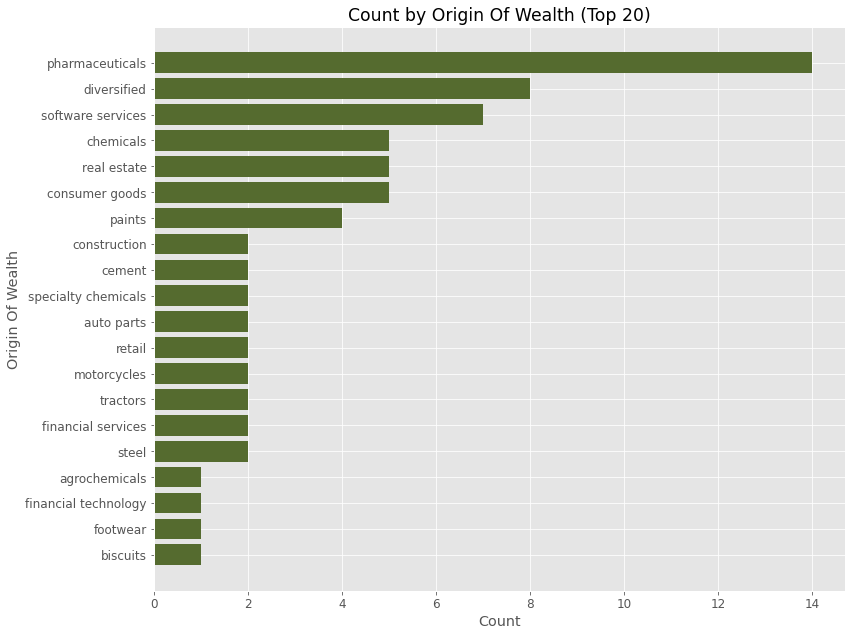

In [12]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['OriginOfWealth'].value_counts()[:20].keys(), width=df['OriginOfWealth'].value_counts()[:20].values, color='darkolivegreen', align='center')
ax.set(title='Count by Origin Of Wealth (Top 20)', xlabel='Count', ylabel='Origin Of Wealth')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [13]:
df.describe()

,NetWorth
count,100.000000
mean,7750.500000
std,12294.281119
min,1940.000000
25%,2815.000000
50%,3960.000000
75%,6950.000000
max,92700.000000


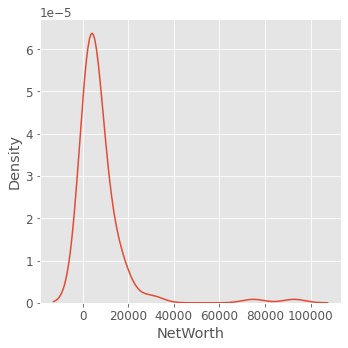

In [14]:
sns.displot(df, x='NetWorth', kind='kde')

In [15]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

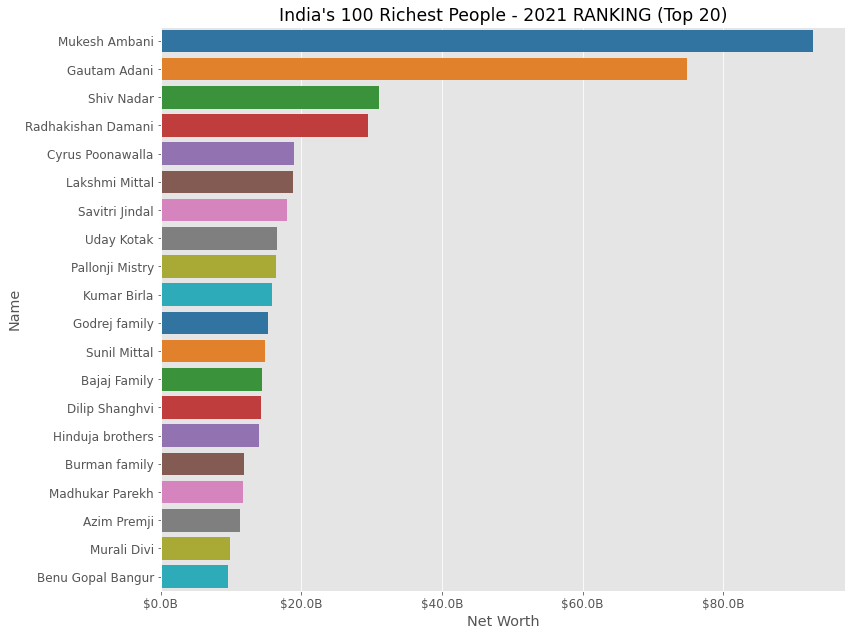

In [16]:
fig, ax = plt.subplots()
sns.barplot(
  data=df.sort_values(by='Rank', ascending=True)[:20],
  x='NetWorth', y='Name',
  palette='tab10')

ax.set(title="India's 100 Richest People - 2021 RANKING (Top 20)", xlabel='Net Worth', ylabel='Name')
ax.xaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [17]:
df.groupby('OriginOfWealth')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=False)

,NetWorth
OriginOfWealth,
diversified,138710.0
pharmaceuticals,76630.0
"commodities, infrastructure",74800.0
software services,58840.0
steel,36800.0
paints,31450.0
"retail, investments",29400.0
consumer goods,29240.0
real estate,21600.0


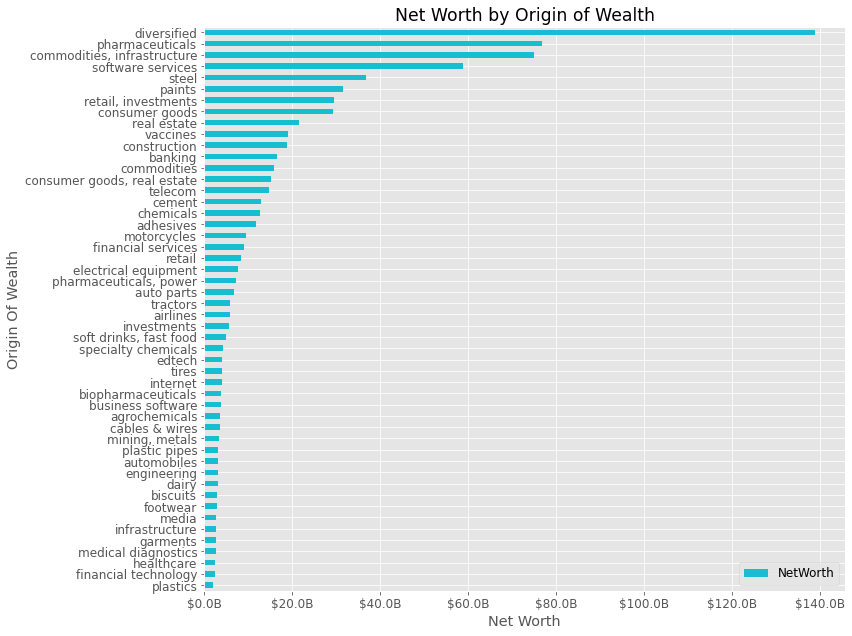

In [18]:
ax = df.groupby('OriginOfWealth')\
  .agg(np.sum).sort_values(by='NetWorth', ascending=True)\
  .plot(kind='barh', color='tab:cyan')

ax.set(title='Net Worth by Origin of Wealth', xlabel='Net Worth', ylabel='Origin Of Wealth')
ax.xaxis.set_major_formatter(format_bill)